In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
blobR = 21
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_DS = f'fom_DETSIM_R{blobR}mm.npz'
npz_filename_DS_p200 = f'fom_DETSIM_psf200_R{blobR}mm.npz'
npz_filename_DS_CM = f'fom_DETSIM_R{blobR}mm_202012.npz'
npz_filename_FS = f'fom_FULLSIM_R{blobR}mm.npz'
npz_filename_DS_NFLEX = f'fom_NFLEX_DETSIM_R{blobR}mm_202012.npz'

In [4]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS = np.load(npz_path+npz_filename_DS)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)
d_DS_NFLEX = np.load(npz_path+npz_filename_DS_NFLEX)

In [5]:
print(d_DS_CM.files)

['e', 'b', 'fom', 'e_error', 'b_error', 'fom_error', 'blobcut_energy']


In [6]:
e_FS = d_FS['e']
b_FS = d_FS['b']
eE_FS = d_FS['e_error']
bE_FS = d_FS['b_error']
fom_FS = d_FS['fom']
fomE_FS = d_FS['fom_error']
blobcut_FS = d_FS['blobcut_energy']

e_DS = d_DS['e']
b_DS = d_DS['b']
eE_DS = d_DS['e_error']
bE_DS = d_DS['b_error']
fom_DS = d_DS['fom']
fomE_DS = d_DS['fom_error']
blobcut_DS = d_DS['blobcut_energy']

e_DS_p200 = d_DS_p200['e']
b_DS_p200 = d_DS_p200['b']
eE_DS_p200 = d_DS_p200['e_error']
bE_DS_p200 = d_DS_p200['b_error']
fom_DS_p200 = d_DS_p200['fom']
fomE_DS_p200 = d_DS_p200['fom_error']
blobcut_DS_p200 = d_DS_p200['blobcut_energy']

e_DS_CM = d_DS_CM['e']
b_DS_CM = d_DS_CM['b']
eE_DS_CM = d_DS_CM['e_error']
bE_DS_CM = d_DS_CM['b_error']
fom_DS_CM = d_DS_CM['fom']
fomE_DS_CM = d_DS_CM['fom_error']
blobcut_DS_CM = d_DS_CM['blobcut_energy']

e_DS_NFLEX = d_DS_NFLEX['e']
b_DS_NFLEX = d_DS_NFLEX['b']
eE_DS_NFLEX = d_DS_NFLEX['e_error']
bE_DS_NFLEX = d_DS_NFLEX['b_error']
fom_DS_NFLEX = d_DS_NFLEX['fom']
fomE_DS_NFLEX = d_DS_NFLEX['fom_error']
blobcut_DS_NFLEX = d_DS_NFLEX['blobcut_energy']

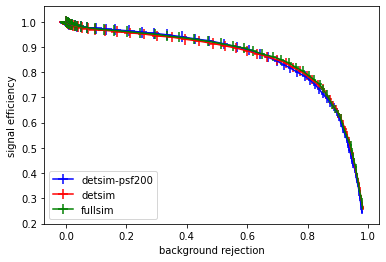

In [7]:
fig, ax = plt.subplots()
ax.errorbar(1-b_DS_p200,e_DS_p200, xerr=bE_DS_p200, yerr=eE_DS_p200, fmt = '-b', label = 'detsim-psf200')
ax.errorbar(1-b_DS,e_DS, xerr=bE_DS, yerr=eE_DS, fmt = '-r', label = 'detsim')
ax.errorbar(1-b_FS,e_DS, xerr=bE_FS, yerr=eE_FS, fmt = '-g', label = 'fullsim')

plt.ylabel('signal efficiency')
plt.xlabel('background rejection')
plt.legend(loc=3);
#plt.title('Cut efficiency')

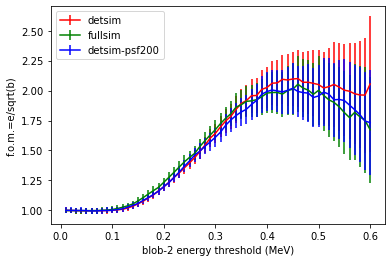

In [8]:
fig, ax = plt.subplots()
ax.errorbar(blobcut_DS,fom_DS, yerr=fomE_DS,fmt = '-r', label = 'detsim')
ax.errorbar(blobcut_FS,fom_FS, yerr=fomE_FS,fmt = '-g', label = 'fullsim')
ax.errorbar(blobcut_DS_p200,fom_DS_p200, yerr=fomE_DS_p200,fmt = '-b', label = 'detsim-psf200')

plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

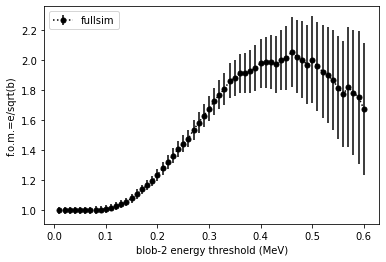

In [9]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(blobcut_FS,fom_FS, yerr=fomE_FS, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'fullsim')
#ax.errorbar(blobcut_DS_p200,fom_DS_p200, yerr=fomE_DS_p200, marker='o', markersize=5, linestyle=ls, color = 'red', label = 'detsim')

#ax.errorbar(blobcut_DS_p200,fom_DS_p200, yerr=fomE_DS_p200,fmt = '-r', label = 'detsim')

plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

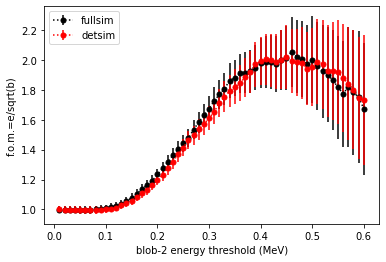

In [10]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(blobcut_FS,fom_FS, yerr=fomE_FS, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'fullsim')
ax.errorbar(blobcut_DS_p200,fom_DS_p200, yerr=fomE_DS_p200, marker='o', markersize=5, linestyle=ls, color = 'red', label = 'detsim')

#ax.errorbar(blobcut_DS_p200,fom_DS_p200, yerr=fomE_DS_p200,fmt = '-r', label = 'detsim')

plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

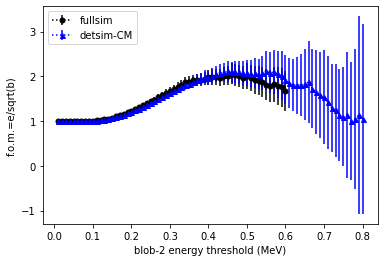

In [11]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(blobcut_FS,fom_FS, yerr=fomE_FS, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'fullsim')
ax.errorbar(blobcut_DS_CM,fom_DS_CM, yerr=fomE_DS_CM, marker="^", markersize=5, linestyle=ls, color = 'blue', label = 'detsim-CM')

plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

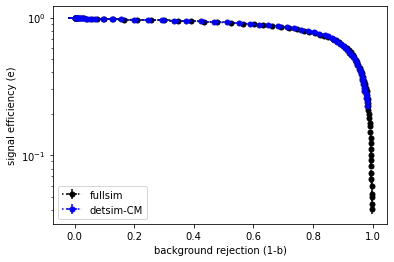

In [12]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(1-b_DS_CM,e_DS_CM, xerr=bE_DS_CM, yerr=eE_DS_CM, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'fullsim')
ax.errorbar(1-b_FS,e_FS, xerr=bE_FS, yerr=eE_FS, marker='o', markersize=5, linestyle=ls, color = 'blue', label = 'detsim-CM')

plt.ylabel('signal efficiency (e)')
plt.xlabel('background rejection (1-b)')
plt.yscale('log')
plt.legend(loc=3);

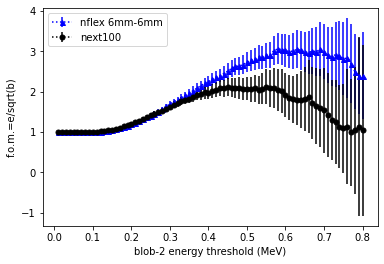

In [13]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(blobcut_DS_NFLEX,fom_DS_NFLEX, yerr=fomE_DS_NFLEX, marker="^", markersize=5, linestyle=ls, color = 'blue', label = 'nflex 6mm-6mm')
ax.errorbar(blobcut_DS_CM,fom_DS_CM, yerr=fomE_DS_CM, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'next100')

plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

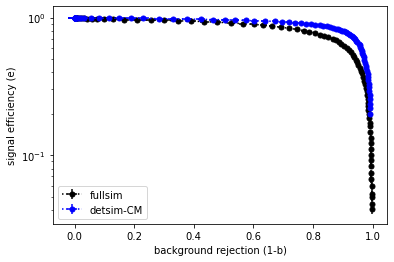

In [14]:
fig, ax = plt.subplots()
ls = 'dotted'
ax.errorbar(1-b_DS_CM,e_DS_CM, xerr=bE_DS_CM, yerr=eE_DS_CM, marker='o', markersize=5, linestyle=ls, color = 'black', label = 'fullsim')
ax.errorbar(1-b_DS_NFLEX,e_DS_NFLEX, xerr=bE_DS_NFLEX, yerr=eE_DS_NFLEX, marker='o', markersize=5, linestyle=ls, color = 'blue', label = 'detsim-CM')

plt.ylabel('signal efficiency (e)')
plt.xlabel('background rejection (1-b)')
plt.yscale('log')
plt.legend(loc=3);